In [5]:
import torch
import torch.nn as nn
import math

In [32]:
class PositionEncoding(nn.Module):
    
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute PE in log space
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1) # shape would be max_len x d_model
        div_term = torch.exp(
            torch.arange(0, d_model, 2) *
            (-math.log(10000.0) / d_model)
        ).unsqueeze(0)
        pe[:, ::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)
    
    def forward(self, x):
        # x.size(1):  for the length of the sentences.
        x = x + pe[:, :x.size(1)]

In [33]:
pe_instance = PositionEncoding(512, 0.1)

In [2]:
import numpy as np

In [3]:
np.exp(-np.log(10000) / 512)

0.9821718891880378

In [4]:
-np.log(10000) / 512

-0.017988946039015984

In [8]:
d_model = 16
torch.exp(
            torch.arange(0, d_model, 2) *
            (-math.log(10000.0) / d_model)
        )

tensor([1.0000e+00, 3.1623e-01, 1.0000e-01, 3.1623e-02, 1.0000e-02, 3.1623e-03,
        1.0000e-03, 3.1623e-04])

In [21]:
d_model = 512
# log space style.....
ps1 = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000) / d_model))

# this is naive coding style
ps2 = 1/ (10000 ** (torch.arange(0, d_model, 2) / d_model))

In [22]:
len(ps1), len(ps2)

(256, 256)

In [23]:
ps1[:5], ps2[:5]

(tensor([1.0000, 0.9647, 0.9306, 0.8977, 0.8660]),
 tensor([1.0000, 0.9647, 0.9306, 0.8977, 0.8660]))

In [24]:
import matplotlib.pyplot as plt

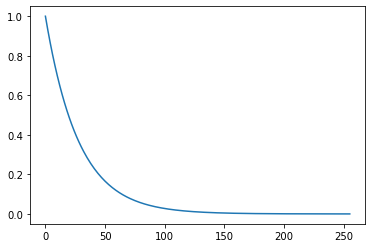

In [27]:
# clearly, for this dimention encoding, it singlely decreasing.

plt.plot(range(d_model//2), ps1.numpy())

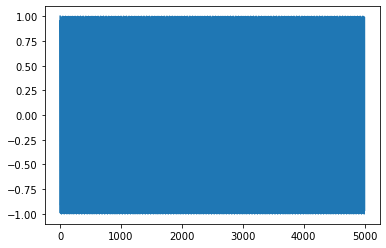

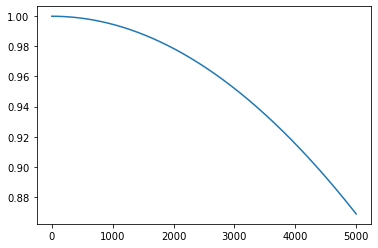

In [45]:
plot_len = 4999
# add position encoding
for dim in [1, 511]:
    plt.figure()
    plt.plot(range(plot_len), pe_instance.pe[0, :plot_len, dim].numpy())

The dimention could control the frequence when position changes
  1. the left part has higher frequence when position changes
  2. The right part has lower frequence when position changes.

In [47]:
torch.triu(torch.ones(5, 5), diagonal=1)

tensor([[0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]])

In [48]:
1 - torch.triu(torch.ones(5, 5), diagonal=1) # masked out furture labels.

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])